## Variation of origin-test-reader

In [1]:
#!/usr/bin/env python

import sys
import os
import random
import time
import zmq
import json
import numpy
import matplotlib.pyplot as plt

# first find ourself
fullBinPath  = os.path.abspath(os.getcwd() + "/" + sys.argv[0])
fullBasePath = os.path.dirname(os.path.dirname(fullBinPath))
fullLibPath  = os.path.join(fullBasePath, "lib")
fullLibPath='C:\Users\Rb\LabSoftware\Origin\lib'
fullCfgPath  = os.path.join(fullBasePath, "config")
fullCfgPath='C:\Users\Rb\LabSoftware\Origin\config'
sys.path.append(fullLibPath)
print fullLibPath
from origin.client import server, random_data

if len(sys.argv) > 1:
  if sys.argv[1] == 'test':
    configfile = os.path.join(fullCfgPath, "origin-server-test.cfg")
  else:
    configfile = os.path.join(fullCfgPath, sys.argv[1])
else:
  configfile = os.path.join(fullCfgPath, "origin-server.cfg")

import ConfigParser
config = ConfigParser.ConfigParser()
config.read(configfile)

context = zmq.Context()
socket = context.socket(zmq.REQ)
#host = config.get('Server','ip')
host='hexlabmonitor.physics.wisc.edu'

#port = config.getint('Server','read_port')
port=5561
socket.connect("tcp://%s:%s" % (host,port))
stream_test_list = ['ULETrans960']

def to32bit(timestamp):
    return float(timestamp)/2**32

C:\Users\Rb\LabSoftware\Origin\lib


In [51]:
starttime=time.time()-60*60*1
stoptime=time.time()-10 # now
for stream in stream_test_list:
    print "sending raw read request for stream `{}`....".format(stream)
    request_obj = { 'start':starttime, 'stop':stoptime,'stream': stream, 'raw': True }
    socket.send(json.dumps(request_obj))
    response = socket.recv()
    #templist=numpy.array(response)
    #print "Received data, when converted to numpy array, dimension of"
    #print templist

sending raw read request for stream `ULETrans960`....


In [52]:
dict=json.loads(response)
indicator=dict[0]
truedata=dict[1]
lock=numpy.array(truedata['lock'],dtype=bool)
voltages=numpy.array(truedata['piezovoltage'])
validvoltages=numpy.ma.array(voltages,mask=numpy.invert(lock))

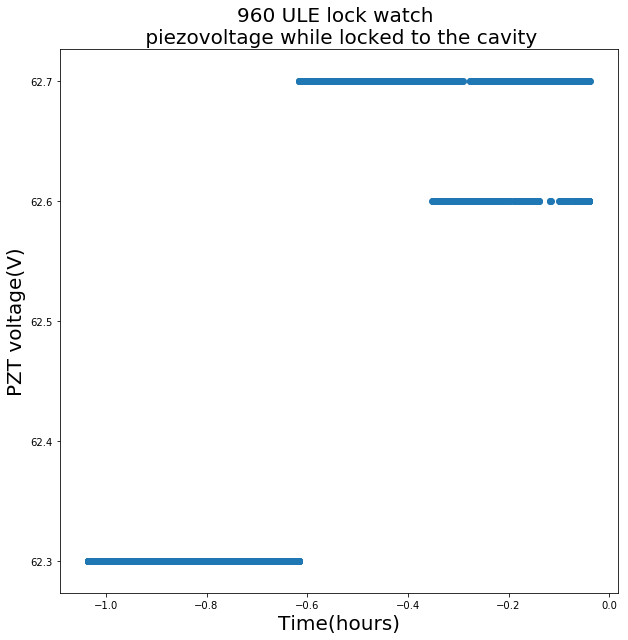

In [64]:
fig=plt.figure(figsize=(10,10))
timedata=(numpy.array(map(to32bit,truedata['measurement_time']))-time.time())/3600
plt.scatter(timedata,validvoltages)
plt.title('960 ULE lock watch \n piezovoltage while locked to the cavity',fontsize=20)
plt.ylabel('PZT voltage(V)',fontsize=20)
plt.xlabel('Time(hours)',fontsize=20)
plt.show()


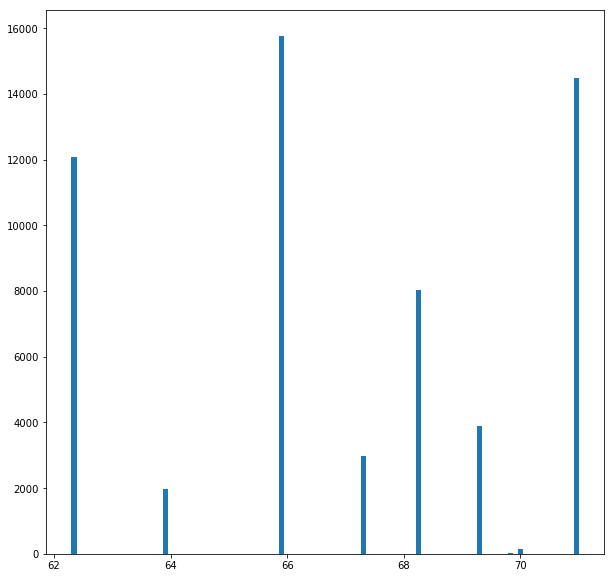

In [37]:
fig2=plt.figure(figsize=(10,10));
plt.hist(validvoltages,bins=100);
plt.show()

In [23]:
truedata['lock']

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0